# Table of Contents
 <p><div class="lev1"><a href="#Some-maps"><span class="toc-item-num">1&nbsp;&nbsp;</span>Some maps</a></div><div class="lev2"><a href="#Example-maps-of-precipitation,-omega_500,-qvstar_925"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Example maps of precipitation, omega_500, qvstar_925</a></div><div class="lev3"><a href="#Daily"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Daily</a></div><div class="lev2"><a href="#Example-maps-of-coarsened-precipitation"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Example maps of coarsened precipitation</a></div><div class="lev3"><a href="#Coasen-in-time"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Coasen in time</a></div><div class="lev3"><a href="#Coarsen-in-space"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Coarsen in space</a></div><div class="lev1"><a href="#Figures-at-a-specific-scale"><span class="toc-item-num">2&nbsp;&nbsp;</span>Figures at a specific scale</a></div><div class="lev2"><a href="#Vertical-profiles"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Vertical profiles</a></div><div class="lev2"><a href="#1D-PDFs"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>1D PDFs</a></div><div class="lev3"><a href="#In-a-precipitation-bin"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>In a precipitation bin</a></div><div class="lev3"><a href="#Precipitation-and-scalings"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Precipitation and scalings</a></div><div class="lev2"><a href="#Decomposition-of-the-variance"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Decomposition of the variance</a></div><div class="lev2"><a href="#2D-PDFS"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>2D PDFS</a></div><div class="lev1"><a href="#Multiscale-numbers"><span class="toc-item-num">3&nbsp;&nbsp;</span>Multiscale numbers</a></div><div class="lev2"><a href="#Fractional-change-in-extreme-precipitation"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fractional change in extreme precipitation</a></div><div class="lev1"><a href="#Multiscale-figures"><span class="toc-item-num">4&nbsp;&nbsp;</span>Multiscale figures</a></div><div class="lev2"><a href="#epsilon-for-both-scalings-as-a-function-of-scale"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>epsilon for both scalings as a function of scale</a></div><div class="lev2"><a href="#Normalized-variance"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Normalized variance</a></div>

In [7]:
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%autoreload 2

import pandas as pd
import numpy as np
import numpy.ma as ma
import dask.array as da
import matplotlib.pyplot as plt
from matplotlib import mplDeprecation
import datetime as dt
import sys,os,glob
import matplotlib
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
import pickle

## Add own library to path
workdir = os.getcwd()
thismodule = sys.modules[__name__]
moduledir = os.path.join(os.path.dirname(workdir),'functions')
sys.path.insert(0,moduledir)
print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                 for x in glob.glob(os.path.join(moduledir,'*.py'))])

## Load own libraries
from importingData import *
from scalingApproximations import *
from plotMaps import *
from plot1DInvLog import *
from statisticalDistributions import *
from slicingAndSubsetting import *
from outputResults import *
from CAMsettings import *
from plot2D import *

## Graphical parameters
plt.style.use(os.path.join(matplotlib.get_configdir(),'stylelib/presentation.mplstyle'))

Own modules available: ['CAMsettings', 'daskOptions', 'environmentAndDirectories', 'importingData', 'outputResults', 'physicalConstants', 'plot1DInvLog', 'plot2D', 'plotMaps', 'scalingApproximations', 'slicingAndSubsetting', 'statisticalDistributions', 'thermoConstants', 'thermoFunctions']


In [9]:
time_strides = '1h','3h','6h','12h','1d','2d','4d','8d'
# time_strides = '3h','6h','12h','1d','2d','4d','8d'
resolutions = '1dx','2dx','3dx','4dx','5dx','6dx','7dx','8dx','9dx'
N_times = len(time_strides)
N_res = len(resolutions)

ranks_label = 'Q8-Q41'
dates_label = '185005010100-185105010000'
dates_label2 = '185005010100-185009010000'

In [10]:
print("missing results")

missing_dictionary = {}
for experiment in 'piControl','abrupt4xCO2':
    missing_dictionary[experiment] = {}
    for compset in 'FSPCAMm_AMIP','FAMIPC5':
        missing_dictionary[experiment][compset] = []
        
        resultdir = os.path.join(os.path.dirname(workdir),'results','omega500tsps',compset,experiment,'r1i1p1','tropics')

        for time_stride in time_strides:
            for resolution in resolutions:
                filename = 'results_dictionary_%s_%s.pickle'%(ranks_label,dates_label)
                dirpath = os.path.join(resultdir,time_stride,resolution)
#                 if not np.any(['dictionary' in p for p in glob.glob(os.path.join(dirpath,'*'))]):
#                     missing_dictionary.append("%s_%s"%(time_stride,resolution))
                if not np.any([filename in p for p in glob.glob(os.path.join(dirpath,'*'))]):
                    missing_dictionary[experiment][compset].append("%s_%s"%(time_stride,resolution))

print(missing_dictionary)

missing results
{'piControl': {'FSPCAMm_AMIP': [], 'FAMIPC5': ['1h_1dx']}, 'abrupt4xCO2': {'FSPCAMm_AMIP': ['1h_1dx', '1h_2dx', '1h_3dx', '1h_4dx', '1h_5dx', '1h_6dx', '1h_7dx', '1h_8dx', '1h_9dx'], 'FAMIPC5': ['1h_1dx', '1h_2dx', '1h_3dx', '1h_4dx', '1h_5dx', '1h_6dx', '1h_7dx', '1h_8dx', '1h_9dx']}}


In [11]:
print("choose run options")
scaling = 'omega500tsps'
compset = 'FSPCAMm_AMIP'
# compset = 'FAMIPC5'
experiment = 'piControl'
member = 'r1i1p1'
subset = 'tropics'
time_ref = '1h'
res_ref = '1dx'
daskarray = False

choose run options


In [12]:
# Results to analyze
resultdir = os.path.join(os.path.dirname(workdir),'results','omega500tsps',compset,experiment,member,subset)

# Figure output directory
figdir = os.path.join(os.path.dirname(workdir),'figures','paper')
os.makedirs(figdir,exist_ok=True)

print()
print("get inputpaths")

# Local input directory
historyFilesSettings = getCAMHistoryFilesSettings()
inputdir, inputdir_processed_day, inputdir_processed_1hr, inputdir_results, inputdir_fx = \
    getInputDirectories(compset,experiment)


get inputpaths


# Some maps

## Example maps of precipitation, omega_500, qvstar_925

In [13]:
## Get longitude, latitude and landmask
print("load lontigude, latitude and landmask")

fh = Dataset(os.path.join(inputdir_fx,'landmask_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc'))
lon1D = fh.variables['lon'][:]
lat1D = fh.variables['lat'][:]
lon2D, lat2D = np.meshgrid(lon1D,lat1D)
lon2D = da.from_array(lon2D,chunks=lon2D.shape)
lat2D = da.from_array(lat2D,chunks=lat2D.shape)


landmask = fh.variables['landmask']

load lontigude, latitude and landmask


In [14]:
print("load physical variables data")

omega_id = 'OMEGA'
pr_id = 'PRECT'
ts_id = 'TS'
ta_id = 'T'
relhum_id = 'RELHUM'
ps_id = 'PS'
dates_maps = '185005010100','185005080000'
handle = 'h0'

output_suffix_maps = '%s'%('-'.join(dates_maps))

omega,pr,ta,relhum,ps = \
    getValues([omega_id,pr_id,ta_id,relhum_id,ps_id],
              compset,subset,experiment,time_ref,res_ref,
              daskarray=daskarray,dates=dates_maps,handle=handle)
pr *= rho_l    # convert from m/s to kg/m2/s

print("compute pressure levels")
    
input_lev_file = os.path.join(inputdir_fx,'lev_fx_CESM111-SPCAM20_allExperiments_r0i0p0.nc')
computeP = getPressureCoordinateFunction(input_lev_file)
pres = computeP(ps)

load physical variables data
Importing OMEGA, PRECT, T, RELHUM, PS from 24 history files between 1850-05-01-03600 and 1850-05-02-00000
compute pressure levels


In [15]:
%%time
print("compute 2D surfaces of predictor variables")
p_500 = 50000
p_925 = 92500; levdim=1
omega_500 = isobaricSurface(omega,pres,p_ref=p_500,levdim=levdim)
use925 = True
if use925:
    ta_925 = isobaricSurface(ta,pres,p_ref=p_925,levdim=levdim) 
    qvstar_925 = saturationSpecificHumidity(ta_925,p_925*np.ones(ps.shape))
else:
    qvstar_s = saturationSpecificHumidity(ts,ps)

compute 2D surfaces of predictor variables
CPU times: user 2.86 s, sys: 1.11 s, total: 3.97 s
Wall time: 4.34 s


### Daily

In [16]:
%%time
print("coarsen variables to daily")
pr_day = coarsenTimeStride(pr,'1d')
omega_500_day = coarsenTimeStride(omega_500,'1d')
qvstar_925_day = coarsenTimeStride(qvstar_925,'1d')

coarsen variables to daily
CPU times: user 3.86 ms, sys: 4.11 ms, total: 7.96 ms
Wall time: 6.81 ms


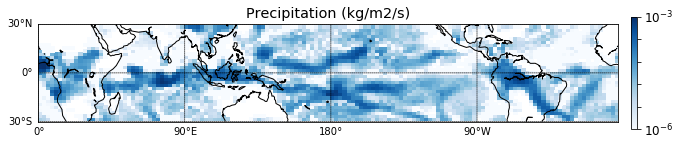

In [17]:
warnings.simplefilter("ignore",category=mplDeprecation)
plotMapTropics(lon2D,lat2D,pr_day[0],title='Precipitation (kg/m2/s)',cmap=plt.cm.Blues,
               v_min=1e-6,v_max=1e-3,mode='log',plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'talkAGU2017_map_pr_day_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

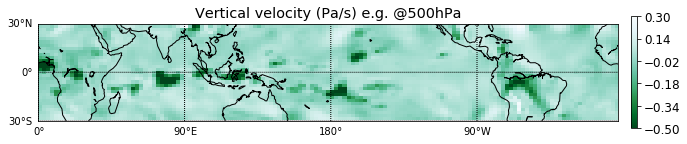

In [18]:
plotMapTropics(lon2D,lat2D,omega_500[0],title='Vertical velocity (Pa/s) e.g. @500hPa',cmap=plt.cm.BuGn_r,
               v_min=-0.5,v_max=0.3,mode='linear',plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'talkAGU2017_map_omega_500_day_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

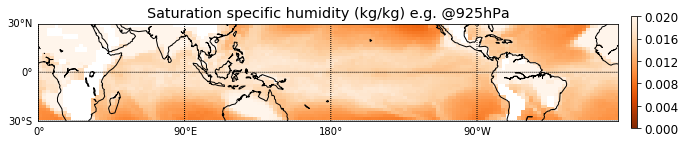

In [19]:
plotMapTropics(lon2D,lat2D,qvstar_925[0],title='Saturation specific humidity (kg/kg) e.g. @925hPa',cmap=plt.cm.Oranges_r,
               v_min =0,v_max=0.02,mode='linear',plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'talkAGU2017_map_qvstar_925_day_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

## Example maps of coarsened precipitation

### Coasen in time

In [20]:
print("coarsen pr to weekly")
pr_week = coarsenTimeStride(pr,'7d')

coarsen pr to weekly


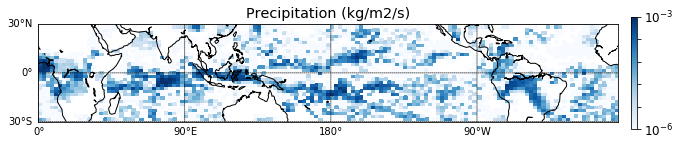

In [38]:
plotMapTropics(lon2D,lat2D,pr[0],title='Precipitation (kg/m2/s)',cmap=plt.cm.Blues,
               v_min=1e-6,v_max=1e-3,mode='log',plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'talkAGU2017_map_pr_1h_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

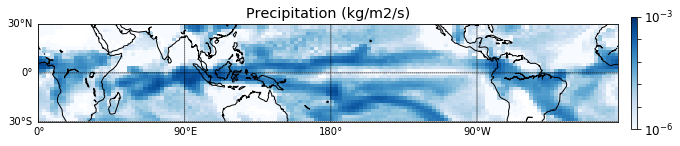

In [69]:
plotMapTropics(lon2D,lat2D,pr_week[0],title='Precipitation (kg/m2/s)',cmap=plt.cm.Blues,
               v_min=1e-6,v_max=1e-3,mode='log',plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'talkAGU2017_map_pr_week_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

### Coarsen in space

In [23]:
print("coarsen pr in space")
pr_day_2dx = coarsenResolution(pr_day,'2dx')
pr_day_4dx = coarsenResolution(pr_day,'4dx')

lon2D_2dx = coarsenResolution(lon2D,'2dx')
lon2D_4dx = coarsenResolution(lon2D,'4dx')
lat2D_2dx = coarsenResolution(lat2D,'2dx')
lat2D_4dx = coarsenResolution(lat2D,'4dx')

coarsen pr in space


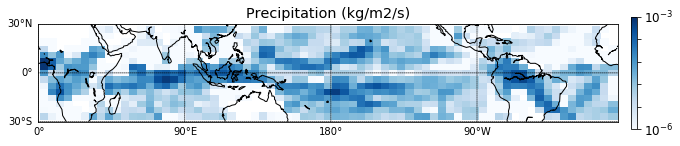

In [24]:
plotMapTropics(lon2D_2dx,lat2D_2dx,pr_day_2dx[0],title='Precipitation (kg/m2/s)',cmap=plt.cm.Blues,
               v_min=1e-6,v_max=1e-3,mode='log',plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'talkAGU2017_map_pr_day_2dx_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

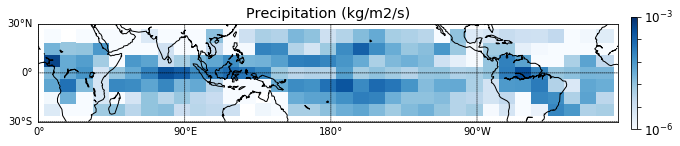

In [25]:
plotMapTropics(lon2D_4dx,lat2D_4dx,pr_day_4dx[0],title='Precipitation (kg/m2/s)',cmap=plt.cm.Blues,
               v_min=1e-6,v_max=1e-3,mode='log',plotfunction='pcolormesh')
plt.savefig(os.path.join(figdir,'talkAGU2017_map_pr_day_4dx_%s_%s_%s.pdf'%(experiment,compset,output_suffix_maps)),
            bbox_inches='tight')

# Figures at a specific scale

In [16]:
print("Load results as a dictionary")
results = {}
for time_stride in time_strides:
    results[time_stride] = {}
    for resolution in resolutions:
        filename = 'results_dictionary_%s_%s.pickle'%(ranks_label,dates_label)
        filepath = os.path.join(resultdir,time_stride,resolution,filename)
        results[time_stride][resolution] = pickle.load(open(filepath,'rb'))

all_varids = results['3h'][res_ref].keys()

Load results as a dictionary


In [17]:
print("choose one scale")
time_to_show = '1d'
res_to_show = '1dx'
results_dict = results[time_to_show][res_to_show]

choose one scale


In [18]:
print([v for v in results_dict.keys() if 'iQ_' in v])

[]


In [19]:
ranks_ref = results_dict['ranks_ref']
i_Q = indexOfRank(99.9,ranks_ref)
iQ_slice = slice(i_Q-5,i_Q+5)
iQ_min = 8
iQ_max = len(results_dict['ranks_ref'])

output_suffix_1scale = '%s_%s_%s'%(experiment,compset,dates_label)

## Vertical profiles

In [14]:
ranks, centers, bins = computePercentilesAndBinsFromRanks(pr.flatten(),ranks_ref)
percentiles = adjustRanks(centers,ranks,ranks_ref)

rank_locations= {}
for rank in ranks_ref:
    rank_id  = "%2.4f"%rank
    print(rank_id,end=' ')
    rank_locations[rank_id] = getRankLocations(rank,pr,ranks,bins,rank_locations)
print()

0.0000 20.5672 36.9043 49.8813 60.1893 68.3772 74.8811 80.0474 84.1511 87.4107 90.0000 92.0567 93.6904 94.9881 96.0189 96.8377 97.4881 98.0047 98.4151 98.7411 99.0000 99.2057 99.3690 99.4988 99.6019 99.6838 99.7488 99.8005 99.8415 99.8741 99.9000 99.9206 99.9369 99.9499 99.9602 99.9684 99.9749 99.9800 99.9842 99.9874 99.9900 


In [15]:
print("Extract vertical profiles in Q-slice")

iQ_slice_profiles = slice(i_Q,i_Q+1)
iQ_ref = range(100)[iQ_slice_profiles]


varnames_for_profiles = ('omega','ta','pres')

ranks_tune = ["%2.4f"%(ranks_ref[iQ-1]) for iQ in iQ_ref]
# Initialize list for each variable
for varname in varnames_for_profiles:
    setattr(thismodule,"%s_ref_list"%varname,[])
# fill list with sample variables at each percentile
for rank in ranks_tune:
    stencil_Q = rank_locations[rank]
    for varname in varnames_for_profiles:
        var = getattr(thismodule,varname)
        var_list = getattr(thismodule,"%s_ref_list"%varname)
        var_list.append(sampleFlattened(var,stencil_Q))
# concat arrays from list
for varname in varnames_for_profiles:
    var_list = getattr(thismodule,"%s_ref_list"%varname)
    setattr(thismodule,"%s_ref"%varname,np.hstack(var_list))

qvstar_ref = saturationSpecificHumidity(ta_ref,pres_ref)

Extract vertical profiles in Q-slice


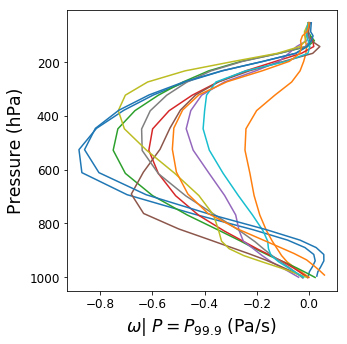

In [16]:
# fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,5))
# var_to_plot = omega_ref.copy()
# var_to_plot[:,6] = np.nan
# for i in range(var_to_plot.shape[1])[:12]:
#     ax.plot(var_to_plot[5:,i],pres_ref[5:,i]/100)
# ax.invert_yaxis()
# ax.set_xlabel(r'$\omega |\,\, P=P_{99.9}$ (Pa/s)',fontsize='xx-large')
# ax.set_ylabel('Pressure (hPa)',fontsize='xx-large')
# plt.savefig(os.path.join(figdir,'talkAGU2017_omega_profiles_Q999_%s_%s_%s.pdf'%(experiment,compset,output_suffix_1scale)),
#             bbox_inches='tight')

In [17]:
# pres_ref_mean = np.mean(pres_ref,axis=1)
# omega_ref_mean = np.mean(omega_ref,axis=1)
# qvstar_ref_mean = np.mean(qvstar_ref,axis=1)

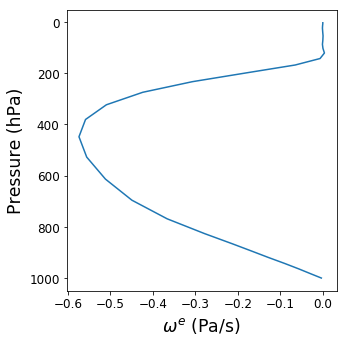

In [18]:
# fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,5))
# ax.plot(omega_ref_mean,pres_ref_mean/100)
# ax.invert_yaxis()
# ax.set_xlabel(r'$\omega^e$ (Pa/s)',fontsize='xx-large')
# ax.set_ylabel('Pressure (hPa)',fontsize='xx-large')
# plt.savefig(os.path.join(figdir,'talkAGU2017_ref_omega_profile_Q999_%s_%s_%s.pdf'%(experiment,compset,output_suffix_1scale)),
#             bbox_inches='tight')

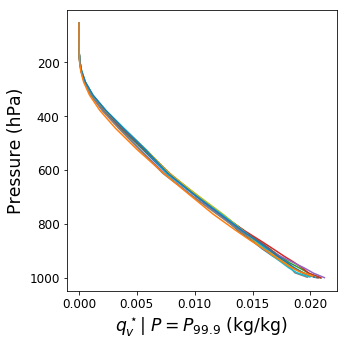

In [64]:
# fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,5))
# var_to_plot = qvstar_ref.copy()
# var_to_plot[:,6] = np.nan
# for i in range(var_to_plot.shape[1])[:12]:
#     ax.plot(var_to_plot[5:,i],pres_ref[5:,i]/100)
# ax.invert_yaxis()
# ax.set_xlabel(r'$q_v^\star  |\,\, P=P_{99.9}$ (kg/kg)',fontsize='xx-large')
# ax.set_ylabel('Pressure (hPa)',fontsize='xx-large')
# plt.savefig(os.path.join(figdir,'talkAGU2017_qvstar_profiles_Q999_%s_%s_%s.pdf'%(experiment,compset,output_suffix_1scale)),
#             bbox_inches='tight')

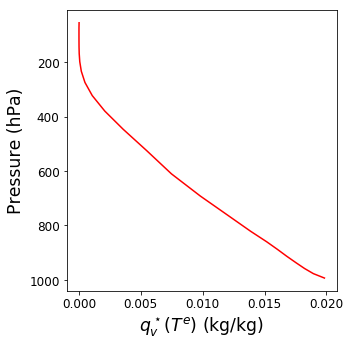

In [65]:
# fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,5))
# ax.plot(qvstar_ref_mean[5:],pres_ref_mean[5:]/100,'r')
# ax.invert_yaxis()
# ax.set_xlabel(r'$q_v^\star(T^e)$ (kg/kg)',fontsize='xx-large')
# ax.set_ylabel('Pressure (hPa)',fontsize='xx-large')
# plt.savefig(os.path.join(figdir,'talkAGU2017_ref_qvstar_profile_Q999_%s_%s_%s.pdf'%(experiment,compset,output_suffix_1scale)),
#             bbox_inches='tight')

## 1D PDFs

### In a precipitation bin

In [19]:
# iQ_start = i_Q-3
# iQ_stop = i_Q+3

> Plot pdf of last computed conditioned on high percentiles of pr


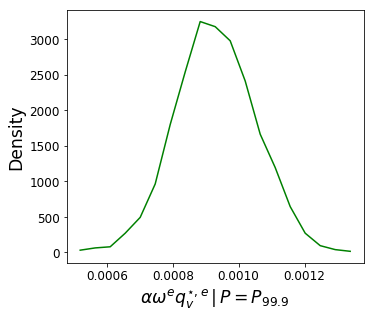

In [18]:
# print("> Plot pdf of last computed conditioned on high percentiles of pr")

# # varname = 'pr_scOGS09'
# varname = 'pr_sc'
# varname_ref = 'pr'

# perc_name = 'percentiles_%s_%s_Q%dQ%d'%(varname,varname_ref,iQ_start,iQ_stop)
# den_name = 'pdf1D_%s_%s_Q%dQ%d'%(varname,varname_ref,iQ_start,iQ_stop)

# fig,ax = plt.subplots(figsize=(5.5,4.5))
# plt.plot(results_dict[perc_name],results_dict[den_name],'g')
# ax.set_xlabel(r"$\alpha \omega^e q_v^{\star,e}\,|\,P=P_{99.9}$",fontsize='xx-large')
# ax.set_ylabel('Density',fontsize='xx-large')

# plt.savefig(os.path.join(figdir,'talkAGU2017_conditional_pdf_%s_%s_%2.4f_%2.4f_%s.pdf'%(varname,varname_ref,
#                                                                             ranks_ref[iQ_start],
#                                                                             ranks_ref[iQ_stop],
#                                                                             output_suffix_1scale)),
#                 bbox_inches='tight')

# plt.show()

### Precipitation and scalings

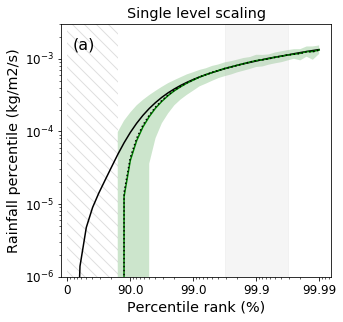

In [20]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))

ax.set_yscale('log')
ax.set_ylim((1e-6,3e-3))

# Grey shading 
i_Q_lims = (iQ_slice.start, iQ_slice.stop)
subplotXShadingRanksILog(ax,results_dict['ranks_ref'],i_Q_lims,alpha=0.15,transformX=False)
# 90% confidence interval for pointwise scaling 2
subplotYShadingRanksILog(ax,results_dict['ranks_ref'],[results_dict['pr_sc_I90'][:,0],results_dict['pr_sc_I90'][:,1]],
                         col='green',transformX=False)
# Interquartile range for pointwise scaling 2
# subplotYShadingRanksILog(ax,results_dict['ranks_ref'],[results_dict['pr_sc_IQR'][:,0],results_dict['pr_sc_IQR'][:,1]],
#                          col='green',transformX=False)
# Mean of pointwise scaling 2
subplotRanksILog(ax,results_dict['ranks_ref'],[results_dict['percentiles'],results_dict['pr_sc_prQ'],
                                               results_dict['pr_sc_vQ']],col=['k','green','k'],ltype=['-','-',':'],\
                 transformX=False)

addXHatchRanksILog(ax,results_dict['ranks_ref'],(0,iQ_min),color='gray',alpha=0.25,hatch='\\\\',transformX=True)

ax.set_xlabel('Percentile rank (%)')
ax.set_ylabel('Rainfall percentile (kg/m2/s)')
ax.set_title(r'Single level scaling')

ax.text(0.04,0.9,'(a)',transform = ax.transAxes,fontsize=16)

plt.savefig(os.path.join(figdir,'paper_pdf_pr_and_pr_sc_mean_I90_grayzone_%s.pdf'%(output_suffix_1scale)),
            bbox_inches='tight',transparent=True)

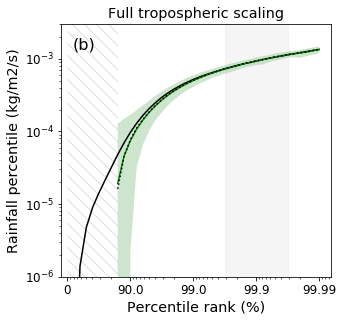

In [21]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))

ax.set_yscale('log')
ax.set_ylim((1e-6,3e-3))

# Grey shading 
i_Q_lims = (iQ_slice.start, iQ_slice.stop)
subplotXShadingRanksILog(ax,results_dict['ranks_ref'],i_Q_lims,alpha=0.15,transformX=False)
# 90% confidence interval for pointwise scaling 2
subplotYShadingRanksILog(ax,results_dict['ranks_ref'],[results_dict['pr_scOGS09_I90'][:,0],
                                                       results_dict['pr_scOGS09_I90'][:,1]],
                         col='green',transformX=False)
subplotRanksILog(ax,results_dict['ranks_ref'],[results_dict['percentiles'],results_dict['pr_scOGS09_prQ'],
                                               results_dict['pr_scOGS09_vQ']],col=['k','green','k'],ltype=['-','-',':'],\
                 transformX=False)

addXHatchRanksILog(ax,results_dict['ranks_ref'],(0,iQ_min),color='gray',alpha=0.25,hatch='\\\\',transformX=True)

ax.set_xlabel('Percentile rank (%)')
ax.set_ylabel('Rainfall percentile (kg/m2/s)')
ax.set_title('Full tropospheric scaling')

ax.text(0.04,0.9,'(b)',transform = ax.transAxes,fontsize=16)

plt.savefig(os.path.join(figdir,'paper_pdf_pr_and_pr_scOGS09_mean_I90_%s.pdf'%(output_suffix_1scale)),
            bbox_inches='tight',transparent=True)

## Decomposition of the variance

> plot variance and corresponding contributions


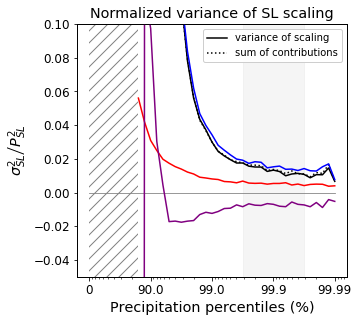

CPU times: user 1.06 s, sys: 30.3 ms, total: 1.09 s
Wall time: 1.15 s


In [22]:
%%time
print("> plot variance and corresponding contributions")

fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,4.5))
ax.set_ylim((-.3,.6))

# Grey shading 
i_Q_lims = (iQ_slice.start, iQ_slice.stop)
subplotXShadingRanksILog(ax,results_dict['ranks_ref'],i_Q_lims,alpha=0.15,transformX=False)

# zero line
addZeroLine(ax,results_dict['ranks_ref'])

# Variance
subplotRanksILog(ax,results_dict['ranks_ref'],
                 results_dict['norm_var_pr_sc_prQ'],
                 col='k',ltype='-',transformX=False)

c_varQ = results_dict['contribQOmega_var_varQ']
c_varOm = results_dict['contribQOmega_var_varOmega']
c_cov = results_dict['contribQOmega_var_covQOmega'] + results_dict['contribQOmega_var_covQ2Omega2']

# Contributions
ax2 = ax.twinx()
subplotRanksILog(ax2,results_dict['ranks_ref'],
                 [c_varQ,
                  c_varOm,
                  c_cov],
                 col=['r','b','purple'],ltype=['-','-','-'],transformX=False)
# Sum
subplotRanksILog(ax,results_dict['ranks_ref'],
                 c_varQ+c_varOm+c_cov,
                 col='k',ltype=':',transformX=False)

addXHatchRanksILog(ax,results_dict['ranks_ref'],(0,iQ_min),transformX=True)

# leg = ax.legend([r'variance of scaling',
#                  r'contribution in $Var(q_v^\star)$',
#                  r'contribution in $Var(\omega)$',
#                  r'covariance term'],
#                  loc='upper left',
#                  framealpha=0.95,
#                  ncol=1)

leg = ax.legend([r'variance of scaling',
                 r'sum of contributions'],
                 loc='upper right',
                 framealpha=0.95,
                 ncol=1)


ax.set_ylim((-0.05,0.1))
ax2.set_ylim((-0.05,0.1))
ax2.axes.get_yaxis().set_visible(False)

ax.set_xlabel('Precipitation percentiles (%)')
ax.set_ylabel(r'$\left.\sigma_{SL}^2 \right/ P_{SL}^2$')
ax.set_title(r'Normalized variance of SL scaling')

plt.savefig(os.path.join(figdir,'paper_var_and_contributions_omega_q_%s.pdf'%output_suffix_1scale),
            bbox_inches='tight')

plt.show()

## 2D PDFS

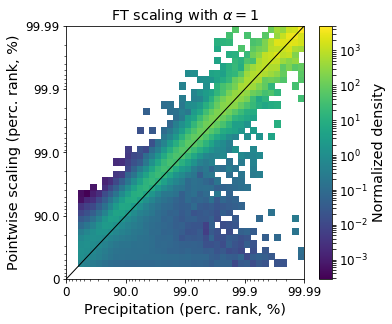

In [23]:
varname1 = 'pr'
varname2 = 'pr_scOGS09'

norm_density2D_name = "norm_density2D_%s_%s"%(varname1,varname2)

fig, ax = plt.subplots(figsize=(5.5,4.5))

# cmap = plt.cm.RdBu_r
# cmap = plt.cm.RdGy_r
# cmap = plt.cm.RdYlBu_r
# cmap = plt.cm.PRGn
cmap = plt.cm.viridis

cb = subplot2DRanksILog(ax,ranks_ref,ranks_ref,results_dict[norm_density2D_name],cmap=cmap,
        transformX=True,transformY=True,Z_mode='log',range_type='full_positive')

cb.ax.set_ylabel('Normalized density')

add1to1Line(ax)

ax.set_xlabel('Precipitation (perc. rank, %)')
ax.set_ylabel('Pointwise scaling (perc. rank, %)')
ax.set_title(r'FT scaling with $\alpha=1$')

plt.savefig(os.path.join(figdir,'paper_norm_pdf2D_%s_and_%s_%s.pdf'%(varname1,varname2,output_suffix_1scale)),
                bbox_inches='tight')
plt.show()

# Multiscale numbers

In [24]:
iQ999 = indexOfRank(99.9,ranks_ref)

In [49]:
print("compute numbers:")
print()
numbers_names = 'eps','eps_OGS09','norm_var_pr_sc_prQ','norm_var_pr_scOGS09_prQ'

# Initialize results for table in paper
exp_names = {'piControl':'CTRL','abrupt4xCO2':'4xCO2'}
comp_names = {'FSPCAMm_AMIP':'SPCAM','FAMIPC5':'CAM5'}
index = ['SPCAM_CTRL','SPCAM_4xCO2','CAM5_CTRL','CAM5_4xCO2']
table = pd.DataFrame(index=index, columns=numbers_names)

results_all = {}
for experiment in 'piControl','abrupt4xCO2':
    results_all[experiment] = {}
    for compset in 'FSPCAMm_AMIP','FAMIPC5':

        results_d = results_all[experiment][compset] = {}
        
        # Load all results
        for time_stride in time_strides:
            results_d[time_stride] = {}
            for resolution in resolutions:
                
                dates = dates_label
#                 if "%s_%s"%(time_stride,resolution) in missing_dictionary[experiment][compset]:
#                     dates = dates_label2
                if time_stride == '1h':
                    dates = dates_label2
                
                resultdir = os.path.join(os.path.dirname(workdir),'results','omega500tsps',compset,experiment,member,subset)
                filename = 'results_dictionary_%s_%s.pickle'%(ranks_label,dates)
                filepath = os.path.join(resultdir,time_stride,resolution,filename)
                results_d[time_stride][resolution] = pickle.load(open(filepath,'rb'))

        print(experiment,compset,":")

        # Simulation name for storage in table
        sim_name = "%s_%s"%(comp_names[compset],exp_names[experiment])
        
        # Compute numbers for table
        N_prQ_Q30 = getTXVarFromResults('N_prQ',results_d,time_strides,resolutions,slice(iQ999,iQ999+1),avg_mode='sum')
        mask = N_prQ_Q30 < 30
        for number_name in 'eps','eps_OGS09':
            var = getTXVarFromResults(number_name,results_d,time_strides,resolutions,avg_mode='mean',var_type='scalar')
            var[mask] = np.nan
            var_meanscales = np.nanmean(var)
            table[number_name][sim_name] = var_meanscales
            print(number_name,'=',var_meanscales)
        for number_name in 'norm_var_pr_sc_prQ','norm_var_pr_scOGS09_prQ':
            var = getTXVarFromResults(number_name,results_d,time_strides,resolutions,iQ_slice=iQ_slice,avg_mode='mean')
            var[mask] = np.nan
            var_meanscales = np.nanmean(var)
            table[number_name][sim_name] = 2*sqrt(var_meanscales)*100
            print(number_name,'=',var_meanscales)
            print('corresponding 2sigma-error =',2*sqrt(var_meanscales))
        print()

compute numbers:

piControl FSPCAMm_AMIP :
eps = 0.835562714322
eps_OGS09 = 0.999218497757
norm_var_pr_sc_prQ = 0.0205232166913
corresponding 2sigma-error = 0.28651852778699266
norm_var_pr_scOGS09_prQ = 0.0117352717689
corresponding 2sigma-error = 0.21665891875418067

piControl FAMIPC5 :
eps = 0.867391263186
eps_OGS09 = 1.05682775788
norm_var_pr_sc_prQ = 0.032383989826
corresponding 2sigma-error = 0.3599110435980891
norm_var_pr_scOGS09_prQ = 0.0276027090018
corresponding 2sigma-error = 0.33228126039120376

abrupt4xCO2 FSPCAMm_AMIP :
eps = 0.832346260624
eps_OGS09 = 0.99791227499
norm_var_pr_sc_prQ = 0.0151233091305
corresponding 2sigma-error = 0.24595372841645713
norm_var_pr_scOGS09_prQ = 0.0100876508563
corresponding 2sigma-error = 0.20087459626685567

abrupt4xCO2 FAMIPC5 :
eps = 0.902577277878
eps_OGS09 = 1.07246402372
norm_var_pr_sc_prQ = 0.030321578389
corresponding 2sigma-error = 0.3482618462535313
norm_var_pr_scOGS09_prQ = 0.0331674624041
corresponding 2sigma-error = 0.3642387261

In [50]:
print(table.to_latex(float_format=lambda x:"%2.2f"%x))

\begin{tabular}{lllll}
\toprule
{} &  eps & eps\_OGS09 & norm\_var\_pr\_sc\_prQ & norm\_var\_pr\_scOGS09\_prQ \\
\midrule
SPCAM\_CTRL  & 0.84 &      1.00 &              28.65 &                   21.67 \\
SPCAM\_4xCO2 & 0.83 &      1.00 &              24.60 &                   20.09 \\
CAM5\_CTRL   & 0.87 &      1.06 &              35.99 &                   33.23 \\
CAM5\_4xCO2  & 0.90 &      1.07 &              34.83 &                   36.42 \\
\bottomrule
\end{tabular}



## Fractional change in extreme precipitation

In [51]:
results_all['abrupt4xCO2']['FSPCAMm_AMIP']['1h']['1dx']['percentiles']

array([             nan,   0.00000000e+00,   2.79458510e-10,
         4.20406790e-08,   5.98093749e-07,   2.94337142e-06,
         8.21915773e-06,   1.64414670e-05,   2.82714017e-05,
         4.46563040e-05,   6.78573124e-05,   1.01704718e-04,
         1.49566270e-04,   2.12001298e-04,   2.87557206e-04,
         3.71283204e-04,   4.60593762e-04,   5.51809418e-04,
         6.43420028e-04,   7.34194766e-04,   8.23230649e-04,
         9.10647908e-04,   9.95745141e-04,   1.07905892e-03,
         1.15907656e-03,   1.23767193e-03,   1.31333756e-03,
         1.38660303e-03,   1.45735023e-03,   1.52761632e-03,
         1.59548802e-03,   1.66135831e-03,   1.72520068e-03,
         1.79009950e-03,   1.85498202e-03,   1.91780777e-03,
         1.97939591e-03,   2.04389764e-03,   2.10361835e-03,
         2.15929551e-03,   2.21797856e-03])

In [52]:
pr_warm_SPCAM = getTXVarFromResults('percentiles',results_all['abrupt4xCO2']['FSPCAMm_AMIP'],time_strides,resolutions,avg_mode='mean',var_type='scalar')
pr_cold_SPCAM = getTXVarFromResults('percentiles',results_all['piControl']['FSPCAMm_AMIP'],time_strides,resolutions,avg_mode='mean',var_type='scalar')

In [53]:
frac_change_pr = (pr_warm_SPCAM/pr_cold_SPCAM - 1)/4.3

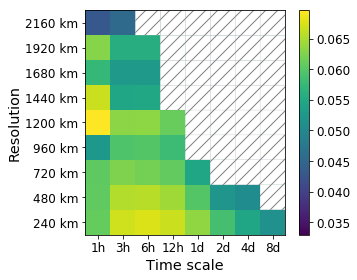

In [81]:
var = frac_change_pr.copy()

fig, ax = plt.subplots(ncols=1,nrows=1)
cb = subplotMultiscaleVar(ax,var,time_strides)
addHatchBelowThreshold(ax,N_prQ_Q30,30)
plt.savefig(os.path.join(figdir,'paper_eps_pr_sc_%s.pdf'%(output_suffix_1scale)),
            bbox_inches='tight',transparent=True)

# Multiscale figures

## epsilon for both scalings as a function of scale

In [55]:
print([v for v in all_varids if v.startswith('eps')])

['eps', 'eps_OGS09', 'eps_OGS09ad']


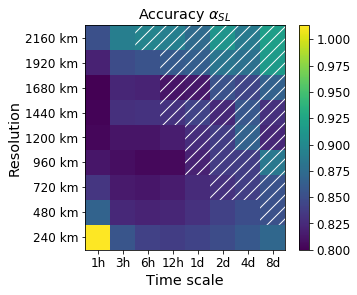

In [80]:
eps_ms = getTXVarFromResults('eps',results,time_strides,resolutions,avg_mode='mean',var_type='scalar')

fig, ax = plt.subplots(ncols=1,nrows=1)
cb = subplotMultiscaleVar(ax,eps_ms,time_strides)
addHatchBelowThreshold(ax,N_prQ_Q30,30,hide=False)
ax.set_title(r'Accuracy $\alpha_{SL}$')
plt.savefig(os.path.join(figdir,'paper_eps_pr_sc_%s.pdf'%(output_suffix_1scale)),
            bbox_inches='tight',transparent=True)

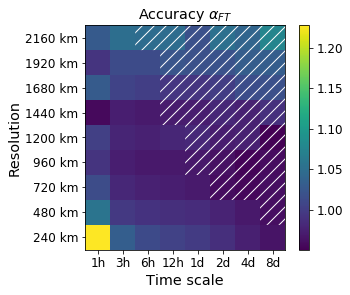

In [79]:
eps_OGS09_ms = getTXVarFromResults('eps_OGS09',results,time_strides,resolutions,avg_mode='mean',var_type='scalar')

fig, ax = plt.subplots(ncols=1,nrows=1)
cb = subplotMultiscaleVar(ax,eps_OGS09_ms,time_strides)
addHatchBelowThreshold(ax,N_prQ_Q30,30,hide=False)
ax.set_title(r'Accuracy $\alpha_{FT}$')
plt.savefig(os.path.join(figdir,'paper_eps_OGS09_pr_sc_%s.pdf'%(output_suffix_1scale)),
            bbox_inches='tight',transparent=True)

## Normalized variance

In [63]:
print("import 1D percentile-dependent variables")
varids_to_sum = set(('N_prQ',))
varids_to_avg = [v for v in all_varids if (v.startswith('norm_') and v.endswith('_prQ')) or v.startswith('contrib')]
varids_to_avg.extend([v for v in all_varids if v.startswith('pr')])
varids_not_to_avg = [v for v in all_varids if v.endswith('_I90') or v.endswith('_IQR')]
varids_to_avg = set(varids_to_avg).difference(set(varids_not_to_avg))

import 1D percentile-dependent variables


In [64]:
results = results_all['piControl']['FSPCAMm_AMIP']

In [65]:
print("load all variables as a function of time_stride and resolution")

ranks_ref = results[time_strides[0]][resolutions[0]]['ranks_ref']
iQ999 = indexOfRank(99.9,ranks_ref)
iQ_slice = slice(iQ999-5,iQ999+5)

iQ_label = "Q%d_Q%d"%(iQ_slice.start,iQ_slice.stop)

for varid in varids_to_avg:
    newvarid = "%s_%s"%(varid,iQ_label)
    newvar = getTXVarFromResults(varid,results,time_strides,resolutions,iQ_slice,avg_mode='mean')
    setattr(thismodule,newvarid,newvar)

for varid in ('N_prQ',):
    newvarid = "%s_Q%s"%(varid,iQ999)
    newvar = getTXVarFromResults(varid,results,time_strides,resolutions,slice(iQ999,iQ999+1),avg_mode='sum')
    setattr(thismodule,newvarid,newvar)


load all variables as a function of time_stride and resolution


In [66]:
print("compute normalizes bias")
norm_bias_pr_sc_prQ_Q25_Q35 = 1-(pr_sc_vQ_Q25_Q35/pr_sc_prQ_Q25_Q35)

compute normalizes bias


In [67]:
print("sum of covariance terms")
contribQOmega_var_allcov_Q25_Q35 = contribQOmega_var_covQOmega_Q25_Q35+contribQOmega_var_covQ2Omega2_Q25_Q35

sum of covariance terms


In [68]:
# mask = (norm_var_pr_sc_I25_prQ_Q25_Q35-norm_var_pr_sc_I75_prQ_Q25_Q35)
# mask[np.isnan(mask)] = np.inf
# mask_noisy = mask >0

In [69]:
mask_noisy = N_prQ_Q30 < 35

In [70]:
print("> Plot normalized variability and contributions")

varids_to_plot = [v for v in locals() if v.endswith(iQ_label) and v.startswith('contrib')]

## Plot bias and variability
for varid in ['norm_bias_pr_sc_prQ_Q25_Q35','norm_var_pr_sc_prQ_Q25_Q35']:
    var = getattr(thismodule,varid)
    # Plot
    if varid.startswith('norm_var_'):
        fig, ax = plt.subplots(ncols=1,nrows=1)
        vmin = 0; vmax = None
#         subplotMultiscaleVar(ax,var,time_strides,cmap=plt.cm.Spectral,vmin=vmin,vmax=vmax)
        subplotMultiscaleVar(ax,var,time_strides,cmap=plt.cm.magma,vmin=vmin,vmax=vmax)
        ax.set_title('Normalized variance')
    elif varid.startswith('norm_bias_'):
        continue
        fig, ax = plt.subplots(ncols=1,nrows=1)
        subplotMultiscaleVar(ax,var,time_strides,cmap=plt.cm.seismic)
        ax.set_title('Normalized bias')
    addHatchBelowThreshold(ax,N_prQ_Q30,30)
    plt.savefig(os.path.join(figdir,'%s_%s.pdf'%(varid,dates_label.replace('-','_'))),bbox_inches='tight')
    plt.close()

## Plot all contributions
for varid in ['contribQOmega_var_varOmega_Q25_Q35',
              'contribQOmega_var_varQ_Q25_Q35',
              'contribQOmega_var_allcov_Q25_Q35']:
    if '_var_' in varid and 'contribQOmega' in varid:
        var = getattr(thismodule,varid)/norm_var_pr_sc_prQ_Q25_Q35*100
    elif '_bias_' in varid:
        continue
        var = getattr(thismodule,varid)/norm_bias_pr_sc_prQ_Q25_Q35*100
    else:
        continue
    # Plot
    fig, ax = plt.subplots(ncols=1,nrows=1)
    cb = subplotMultiscaleVar(ax,var,time_strides,cmap=plt.cm.Spectral,vmin=-120,vmax=120)
    cb.ax.set_ylabel('(%)')
    addHatchBelowThreshold(ax,N_prQ_Q30,30)
    plt.savefig(os.path.join(figdir,'fraction_%s_%s.pdf'%(varid,dates_label.replace('-','_'))),bbox_inches='tight')
    plt.close()


> Plot normalized variability and contributions


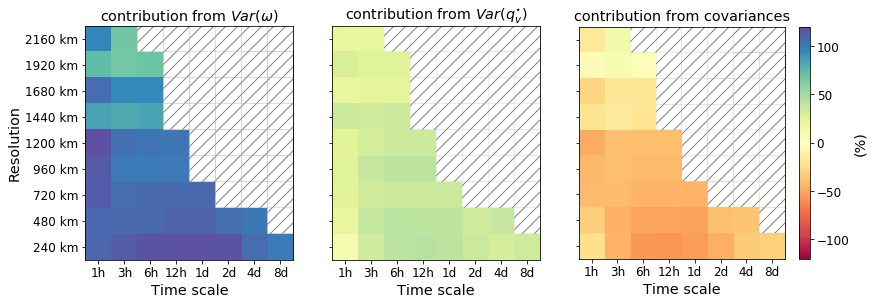

In [77]:
## Plot all contributions side by side
contrib_names = ['contribQOmega_var_varOmega_Q25_Q35',
              'contribQOmega_var_varQ_Q25_Q35',
              'contribQOmega_var_allcov_Q25_Q35']
contrib_titles = [r'contribution from $Var(\omega)$',
                  r'contribution from $Var(q_v^{\star})$',
                  r'contribution from covariances']

fig = plt.figure(figsize=(12,5)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[5,5,5.55]) 
for i in range(3):
    # Load variable
    varid = contrib_names[i]
    var = getattr(thismodule,varid)/norm_var_pr_sc_prQ_Q25_Q35*100
    # Plot
    ax = plt.subplot(gs[i])
    ax.set_title(contrib_titles[i])
    cb = subplotMultiscaleVar(ax,var,time_strides,cmap=plt.cm.Spectral,vmin=-120,vmax=120,cb_on=i==2,sharey=i>0)
    addHatchBelowThreshold(ax,N_prQ_Q30,30,hide=True)
fig.tight_layout()
cb.ax.set_ylabel('(%)')
plt.savefig(os.path.join(figdir,'paper_contrib2Var_SL_%s.pdf'%(dates_label.replace('-','_'))),bbox_inches='tight')